D:\softwares\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


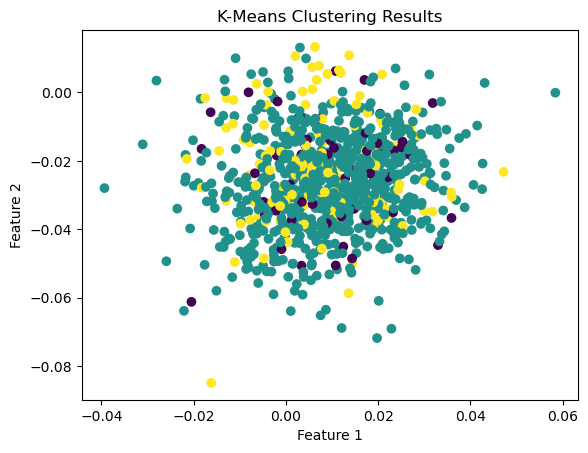

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# Load the dataset, assuming the first row contains headers
df = pd.read_csv('output1.csv')
 
# Check if the last column is non-numeric (e.g., class labels) and remove it
if not pd.to_numeric(df.iloc[:, -1], errors='coerce').notnull().all():
    df = df.iloc[:, :-1]
 
# Check if any columns contain non-numeric values and convert them to numeric
df = df.apply(pd.to_numeric, errors='coerce')
 
# Specify the number of clusters (k)
k = 3
 
# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
 
# Save the results back to a new CSV file
df.to_csv('clustered_dataset.csv', index=False)
 
# Visualize the clusters (2D scatter plot for the first two features)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

D:\softwares\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\softwares\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\softwares\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\softwares\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

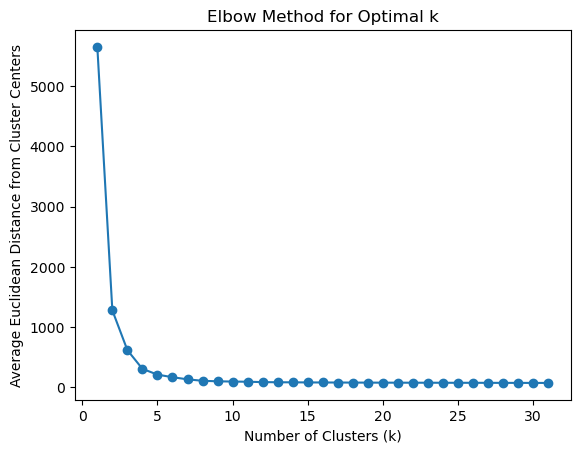

In [2]:
import numpy as np
 
# Check if any columns contain non-numeric values and convert them to numeric
df = df.apply(pd.to_numeric, errors='coerce')
 
# Determine the ideal k using the elbow method
distortions = []
k_range = range(1, 32)
 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)
 
# Plot the elbow curve
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Cluster Centers')
plt.show()